<center>
<font color='DarkTurquoise'>

# Analysis of news topics all over the world

</font>
</center>

### Our project aimed at analyzing news coverage worldwide and examining the prevalence of reports *regarding the ongoing conflict in Ukraine*.

In a world driven by constant information flow, news plays a pivotal role in shaping public opinion and influencing international perceptions. Particularly, the media's role in covering conflicts serves as a crucial indicator of the magnitude and impact of such events on a global scale. So we have made a research about of one of the most pressing geopolitical issues of our time: <span style="color: DarkTurquoise">the war in Ukraine</span>.

With countless news websites disseminating information around the clock, it becomes increasingly challenging to comprehend the true extent of media coverage regarding specific events. Our project takes on this challenge, utilizing <a href="https://scrapy.org" style="color: #55e0a3">Python Scrapy</a> module to retrieve the data and then determine the prevalence and distribution of reports related to the conflict in Ukraine.

We have analyzed <span style="color: DarkTurquoise">5 different countries</span> and their most widely read newspaper:
<p style="line-height: 25px;">
1. <b style="font-size: 20px">USA</b>
  <ul>
    <li><a href="https://www.ft.com/world" style="color: Orange">Financial Times</a></li>
  </ul>
2. <b style="font-size: 20px">Great Britain</b>
  <ul>
    <li><a href="https://subscription.theweek.co.uk" style="color: Orange">The Week</a></li>
  </ul>
3. <b style="font-size: 20px">Germany</b>
  <ul>
    <li><a href="" style="color: Orange">Will be added soon</a></li>
  </ul>
4. <b style="font-size: 20px">South Africa</b>
  <ul>
    <li><a href="https://www.sanews.gov.za" style="color: Orange">South African Government News Agency</a></li>
    <li><a href="https://www.news24.com/news24" style="color: Orange">news24</a></li>
  </ul>
5. <b style="font-size: 20px">Japan</b>
  <ul>
    <li><a href="https://www.japantimes.co.jp" style="color: Orange">The Japan Times</a></li>
  </ul>
</p>

In [1]:
# importing python modules to work with data
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [2]:
# keywords for finding alticles about the war in Ukraine
keywords = [
    "ukraine",
    "ukrainian",
    "russia",
    "russian",
    "dpr",
    "lpr",
    "putin",
    "zelensky"
]

In [3]:
# additional functions
def check(string: str):
    for word in keywords:
        if word in string.lower():
            return True
    return False

def get_month(date: datetime):
    return date.month

<center>
<font color='DarkTurquoise'>

# USA

</font>
</center>

**"The Financial Times"** is one of the world’s leading news organisations, recognised internationally for its authority, integrity and accuracy.

In [4]:
df = pd.read_json('datasets/news_ft.json')
df.head()

,title,date
0,‘Welfare to work’ rules become sticking point ...,2023-05-18
1,Russia admits ‘problems’ as energy revenues fall,2023-05-18
2,France holds up EU energy agreement over nucle...,2023-05-18
3,Penguin Random House sues Florida school distr...,2023-05-18
4,Ecuador’s president triggers ‘mutual death’ cl...,2023-05-18


Forming dataframe containing only news about war in Ukraine:

In [5]:
war_df = df[df['title'].apply(lambda x: check(x))]
war_df.head()

,title,date
1,Russia admits ‘problems’ as energy revenues fall,2023-05-18
6,Ukraine’s allies fear military support will fa...,2023-05-18
9,Xi Jinping courts Central Asia as Russian infl...,2023-05-18
13,Tracking Russia’s invasion of Ukraine in maps,2023-05-18
18,Russia admits ‘problems’ as energy revenues fall,2023-05-18


Calculating the percentage of news about war in Ukraine:

In [6]:
war_perc = []
sorted_dates = sorted(list(war_df.date.unique()))
for date in sorted_dates:
    news_this_date = df[df['date'] == date].shape[0]
    news_war = war_df[war_df['date'] == date].shape[0]
    war_perc.append(round(news_war/news_this_date * 100, 2))

str_dates = list(map(lambda x: str(x)[:10], sorted_dates))

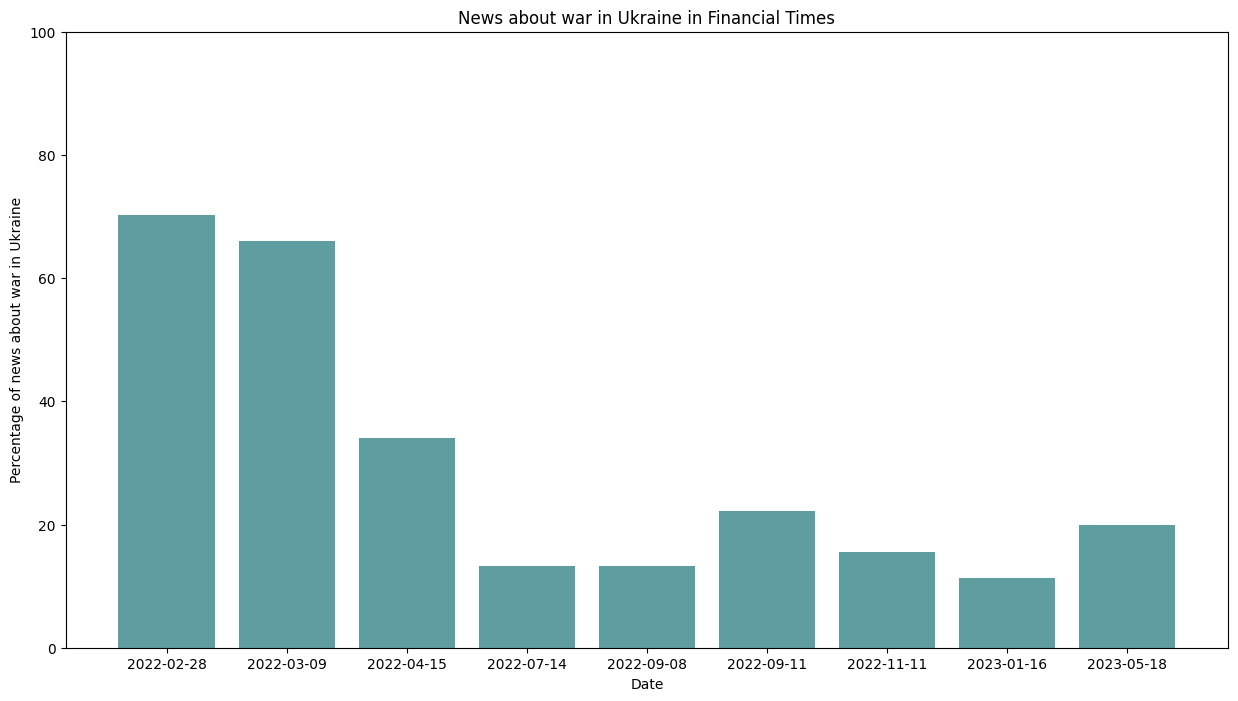

In [7]:
plt.figure(figsize=(15, 8))
plt.bar(str_dates, war_perc, color ='CadetBlue')
plt.ylim(0, 100)
plt.xlabel('Date')
plt.ylabel('Percentage of news about war in Ukraine')
plt.title('News about war in Ukraine in Financial Times')
plt.show()

<center>
<font color='DarkTurquoise'>

# Great Britain

</font>
</center>

**"The Week"** news is a respected digital platform that offers a curated selection of news articles, opinion pieces, and cultural content. The website gathers news articles from various sources, including major national and international publications, and presents them in a concise and digestible format. This approach allows readers to quickly grasp multiple perspectives on a given topic and gain a comprehensive understanding of current events.

In [8]:
df = pd.read_json("datasets/theweek.json")
df.head()

,header,date
0,"Crypto risk, stealth wealth and the end of Vice",2023-05-19
1,The rehabilitation of Syria’s Bashar al-Assad,2023-05-19
2,AI job fears: how can we regulate the ‘rise of...,2023-05-19
3,Pakistan enters ‘uncharted territory’,2023-05-19
4,‘The great AI jobs bloodbath’,2023-05-19


Forming dataframe containing only news about war in Ukraine:

In [9]:
war_df = df[df['header'].apply(lambda x: check(x))]
war_df.head()

,header,date
6,Nato vs. Russia: who would win?,2023-05-18
8,Russia’s allies: who is supporting Putin?,2023-05-18
10,How fruitful was Zelenskyy’s European tour?,2023-05-18
28,Russia’s scaled-back Victory Day parade,2023-05-12
48,Evan Gershkovich: what does Russia want from j...,2023-04-03


<font color='DarkTurquoise'>

## February 2022 - December 2022
</font>

Creating dataframe for period (February 2022 - December 2022)

In [10]:
df_2022 = df.loc[df['date'] < datetime(2023, 1, 1)].copy()
df_2022.loc[:, 'month'] = df_2022['date'].apply(lambda x: get_month(x))

df_2022.head()

,header,date,month
447,What will happen in 2023?,2022-12-30,12
456,Sport’s big winners of 2022,2022-12-29,12
457,Celebrities and global icons who died in 2022,2022-12-29,12
458,The best tabloid stories of 2022,2022-12-27,12
459,People of 2022: from Meghan Markle to Matt Han...,2022-12-27,12


Creating dataframe with news about Ukraine for period (February 2022 - December 2022)

In [11]:
war_df_2022 = war_df.loc[war_df['date'] < datetime(2023, 1, 1)].copy()
war_df_2022.loc[:, 'month'] = war_df_2022['date'].apply(lambda x: get_month(x))

war_df_2022.head()

,header,date,month
462,Putin believes in Santa ‘like all decent peopl...,2022-12-23,12
475,Can landmark Zelenskyy visit to Washington cha...,2022-12-21,12
495,What next for the world if Russia loses in Ukr...,2022-12-16,12
503,VDV: who are Russia’s elite airborne force?,2022-11-28,11
514,"Trump’s trial, Ukraine’s art and extra extra time",2022-11-25,11


Calculation of percentages of Ukrainian news

In [12]:
war_perc_2022 = []
months = list(range(2, 13))
for month in months:
    month_df = df_2022[df_2022['month'] == month].shape[0]
    month_war_df = war_df_2022[war_df_2022['month'] == month].shape[0]
    try:
        war_perc_2022.append(round(month_war_df/month_df * 100, 2))
    except ZeroDivisionError:
        war_perc_2022.append(0.0)

### Visualisation of 2022

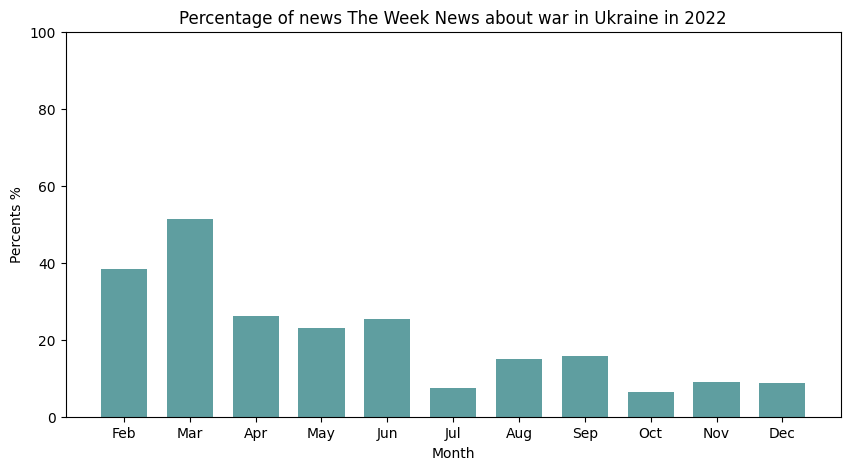

In [13]:
months = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize = (10, 5))

plt.bar(months, war_perc_2022, color ='CadetBlue', width = 0.7)
plt.ylim(0, 100)

plt.xlabel("Month")
plt.ylabel("Percents %")
plt.title("Percentage of news The Week News about war in Ukraine in 2022")
plt.show()

<font color='DarkTurquoise'>

## January 2023 - May 2023
</font>

Creating dataframe for period (January 2023 - May 2023)

In [14]:
df_2023 = df.loc[df['date'] >= datetime(2023, 1, 1)].copy()
df_2023.loc[:, 'month'] = df_2023['date'].apply(lambda x: get_month(x))

df_2023.head()

,header,date,month
0,"Crypto risk, stealth wealth and the end of Vice",2023-05-19,5
1,The rehabilitation of Syria’s Bashar al-Assad,2023-05-19,5
2,AI job fears: how can we regulate the ‘rise of...,2023-05-19,5
3,Pakistan enters ‘uncharted territory’,2023-05-19,5
4,‘The great AI jobs bloodbath’,2023-05-19,5


Creating dataframe with news about Ukraine for period (January 2023 - May 2023)

In [15]:
war_df_2023 = war_df.loc[war_df['date'] >= datetime(2023, 1, 1)].copy()
war_df_2023.loc[:, 'month'] = war_df_2023['date'].apply(lambda x: get_month(x))

war_df_2023.head()

,header,date,month
6,Nato vs. Russia: who would win?,2023-05-18,5
8,Russia’s allies: who is supporting Putin?,2023-05-18,5
10,How fruitful was Zelenskyy’s European tour?,2023-05-18,5
28,Russia’s scaled-back Victory Day parade,2023-05-12,5
48,Evan Gershkovich: what does Russia want from j...,2023-04-03,4


Calculation of percentages of Ukrainian news

In [16]:
war_perc_2023 = []
months = list(range(1, 6))
for month in months:
    month_df = df_2023[df_2023['month'] == month].shape[0]
    month_war_df = war_df_2023[war_df_2023['month'] == month].shape[0]
    try:
        war_perc_2023.append(round(month_war_df/month_df * 100, 2))
    except ZeroDivisionError:
        war_perc_2023.append(0.0)

### Visualisation of 2023

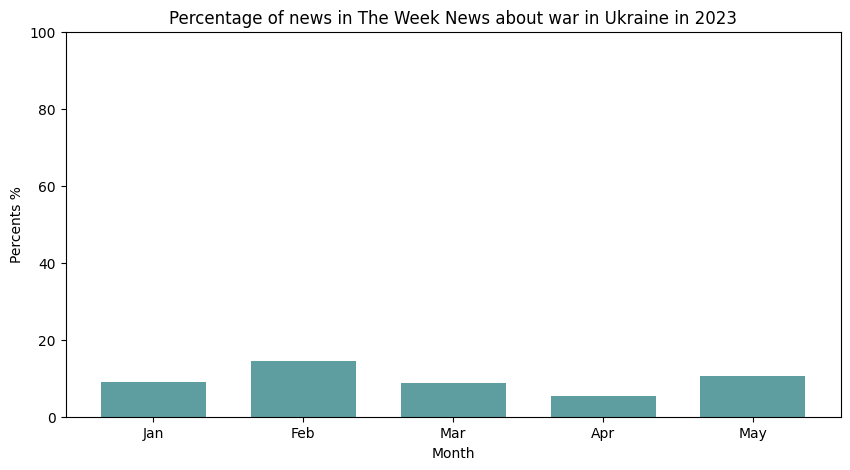

In [17]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
plt.figure(figsize = (10, 5))

plt.bar(months, war_perc_2023, color ='CadetBlue', width = 0.7)
plt.ylim(0, 100)

plt.xlabel("Month")
plt.ylabel("Percents %")
plt.title("Percentage of news in The Week News about war in Ukraine in 2023")
plt.show()

<center>
<font color='DarkTurquoise'>

# Germany

</font>
</center>

Will be added soon

<center>
<font color='DarkTurquoise'>

# South Africa

</font>
</center>

<h3><b>Newspaper</b>: <span style="color: #79c2d0">News24</span></h3>

**News24** is owned by Media24, South Africa's leading media company, with interests in digital media and services, newspapers, magazines, e-commerce, book publishing, print and distribution. 

In [18]:
df = pd.read_json('datasets/news_24_dataset.json')
df.head()

,title,date,url
0,"Will political pacts save SA? Steenhuisen, Mas...",2023-04-13,https://www.news24.com/news24/opinions/reader_...
1,Who will govern SA after 2024? Sign up for our...,2023-02-07,https://www.news24.com/news24/opinions/reader_...
2,WRAP | Public Protector impeachment resumes af...,2023-05-15,https://www.news24.com/news24/southafrica/news...
3,Do you have any complaints or feedback about N...,2020-04-08,https://www.news24.com/news24/southafrica/news...
4,Russian embassy hits back at US ambassador's c...,2023-05-16,https://www.news24.com/news24/politics/governm...


Forming dataframe containing only news about war in Ukraine:

In [19]:
war_df = df[df['title'].apply(lambda x: check(x))]
war_df.head()

,title,date,url
4,Russian embassy hits back at US ambassador's c...,2023-05-16,https://www.news24.com/news24/politics/governm...
7,"#LadyRussiagate | Putin, Zelensky accept Afric...",2023-05-16,https://www.news24.com/news24/politics/parliam...
8,#LadyRussiagate | US ambassador 'totally misre...,2023-05-16,https://www.news24.com/news24/politics/governm...
19,'Non-aligned' nonchalance: SA won't be forced ...,2023-05-15,https://www.news24.com/news24/politics/governm...
25,"#LadyRussiagate: Ramaphosa, Zelensky hold talk...",2023-05-14,https://www.news24.com/fin24/economy/ladyrussi...


<font color='DarkTurquoise'>

## Jun - Dec 2022
</font>

Creating dataframe for period (Jun - Dec 2022)

In [20]:
df_2022 = df[df['date'] < datetime(2023, 1, 1)][1:].copy()
df_2022['month'] = df_2022['date'].apply(lambda x: get_month(x))
df_2022.head()

,title,date,url,month
729,WATCH | Cyril Ramaphosa wins second term as AN...,2022-12-19,https://www.news24.com/news24/politics/breakin...,12
730,WATCH | This is the top 7: all the coverage fr...,2022-12-18,https://www.news24.com/news24/politics/watch-a...,12
731,ANC in Gauteng split between Ramaphosa and Mkh...,2022-12-15,https://www.news24.com/news24/politics/anc-in-...,12
732,POLITICS THIS WEEK | Ramaphosa to meet King Ch...,2022-11-21,https://www.news24.com/news24/politics/politic...,11
733,DA bags majority seats in re-elected Ekurhulen...,2022-11-15,https://www.news24.com/news24/politics/da-bags...,11


Forming dataframe containing only news about war in Ukraine:

In [21]:
war_df_2022 = war_df[war_df['date'] < datetime(2023, 1, 1)].copy()
war_df_2022['month'] = war_df_2022['date'].apply(lambda x: get_month(x))
war_df_2022.head()

,title,date,url,month
744,US trip: Ramaphosa to reaffirm SA’s non-aligne...,2022-09-12,https://www.news24.com/news24/politics/us-trip...,9
760,"SA won't be bullied, Pandor tells Blinken on U...",2022-08-09,https://www.news24.com/news24/politics/sa-wont...,8
838,Wheat shortages caused by Ukraine/Russia war a...,2022-07-23,https://www.news24.com/news24/politics/wheat-s...,7
868,Russia-Ukraine war: Govt faces heat over neutr...,2022-07-18,https://www.news24.com/news24/politics/russia-...,7
969,Russia-Ukraine conflict could force African co...,2022-06-28,https://www.news24.com/news24/politics/russia-...,6


Calculation of percentages of Ukrainian news

In [22]:
war_perc_2022 = []
months = list(range(6, 13))
for month in months:
    month_df = df_2022[df_2022['month'] == month].shape[0]
    month_war_df = war_df_2022[war_df_2022['month'] == month].shape[0]
    try:
        war_perc_2022.append(round(month_war_df/month_df * 100, 2))
    except ZeroDivisionError:
        war_perc_2022.append(0.0)

### Building plot 2022

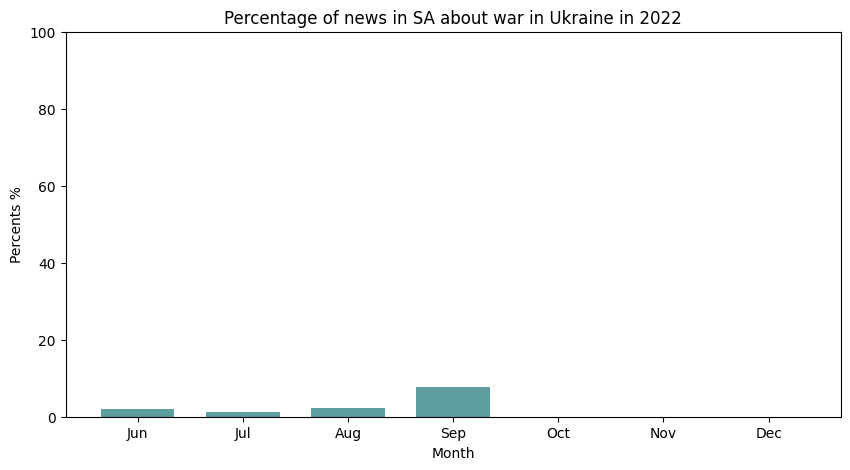

In [23]:
months = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(months, war_perc_2022, color ='CadetBlue', width = 0.7)
plt.ylim(0, 100)

plt.xlabel("Month")
plt.ylabel("Percents %")
plt.title("Percentage of news in SA about war in Ukraine in 2022")
plt.show()

<font color='DarkTurquoise'>

## Jan - May 2023
</font>

Creating dataframe for period (Jan - May 2023)

In [24]:
df_2023 = df[df['date'] >= datetime(2023, 1, 1)].copy()
df_2023['month'] = df_2023['date'].apply(lambda x: get_month(x))

Forming dataframe containing only news about war in Ukraine:

In [25]:
war_df_2023 = war_df[war_df['date'] >= datetime(2023, 1, 1)].copy()
war_df_2023['month'] = war_df_2023['date'].apply(lambda x: get_month(x))
war_df_2023.head()

,title,date,url,month
4,Russian embassy hits back at US ambassador's c...,2023-05-16,https://www.news24.com/news24/politics/governm...,5
7,"#LadyRussiagate | Putin, Zelensky accept Afric...",2023-05-16,https://www.news24.com/news24/politics/parliam...,5
8,#LadyRussiagate | US ambassador 'totally misre...,2023-05-16,https://www.news24.com/news24/politics/governm...,5
19,'Non-aligned' nonchalance: SA won't be forced ...,2023-05-15,https://www.news24.com/news24/politics/governm...,5
25,"#LadyRussiagate: Ramaphosa, Zelensky hold talk...",2023-05-14,https://www.news24.com/fin24/economy/ladyrussi...,5


Calculation of percentages of Ukrainian news

In [26]:
war_perc_2023 = []
months = list(range(1, 6))
for month in months:
    month_df = df_2023[df_2023['month'] == month].shape[0]
    month_war_df = war_df_2023[war_df_2023['month'] == month].shape[0]
    try:
        war_perc_2023.append(round(month_war_df/month_df * 100, 2))
    except ZeroDivisionError:
        war_perc_2023.append(0.0)

### Building plot 2023

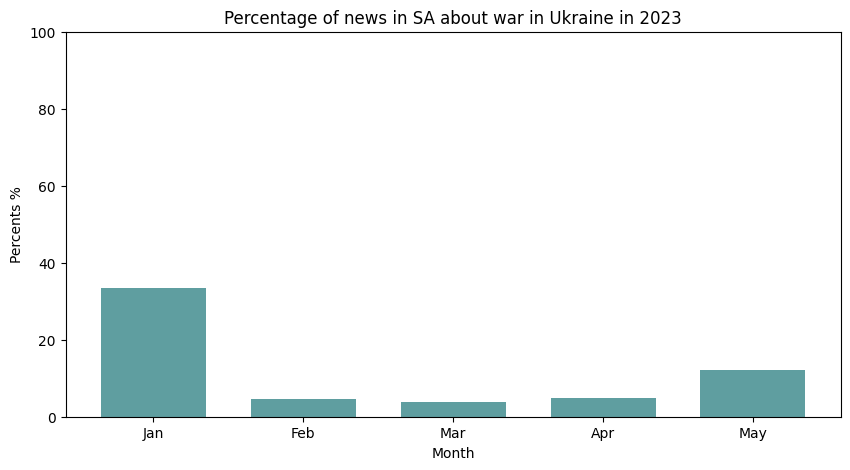

In [27]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(months, war_perc_2023, color ='CadetBlue', width = 0.7)
plt.ylim(0, 100)

plt.xlabel("Month")
plt.ylabel("Percents %")
plt.title("Percentage of news in SA about war in Ukraine in 2023")
plt.show()

<h3><b>Newspaper</b>: <span style="color: #79c2d0">South African Government News Agency</span></h3>

**The SA Government News Agency** is a news service, published by the Government Communication and Information System (GCIS).

In [28]:
df = pd.read_json('datasets/sa_news_dataset.json')
df.head()

,title,date,url
0,Government communication workforce to be upski...,2023-05-16,https://www.sanews.gov.za/south-africa/governm...
1,Keeping SA citizens informed,2023-05-16,https://www.sanews.gov.za/south-africa/keeping...
2,SA and Singapore strengthen longstanding partn...,2023-05-16,https://www.sanews.gov.za/south-africa/sa-and-...
3,Mining remains strong pillar of SA's economy -...,2023-05-16,https://www.sanews.gov.za/south-africa/mining-...
4,Over R14bn to support municipalities' water in...,2023-05-16,https://www.sanews.gov.za/south-africa/over-r1...


Forming dataframe containing only news about war in Ukraine:

In [29]:
war_df = df[df['title'].apply(lambda x: check(x))]
war_df.head()

,title,date,url
16,President Ramaphosa reiterates South Africa's ...,2023-05-15,https://www.sanews.gov.za/south-africa/preside...
651,SA explains abstention from Ukraine resolution...,2023-02-25,https://www.sanews.gov.za/south-africa/sa-expl...
968,Russia-Ukraine conflict should end through dip...,2023-01-23,https://www.sanews.gov.za/south-africa/russia-...
975,SA's navy exercises between China and Russia t...,2023-01-23,https://www.sanews.gov.za/south-africa/sas-nav...
982,SANDF to host China and Russia for multilatera...,2023-01-20,https://www.sanews.gov.za/south-africa/sandf-h...


<font color='DarkTurquoise'>

## Feb - Dec 2022
</font>

Creating dataframe for period (Feb - Dec 2022)

In [30]:
df_2022 = df[df['date'] < datetime(2023, 1, 1)].copy()
df_2022['month'] = df_2022['date'].apply(lambda x: get_month(x))

Forming dataframe containing only news about war in Ukraine:

In [31]:
war_df_2022 = war_df[war_df['date'] < datetime(2023, 1, 1)].copy()
war_df_2022['month'] = war_df_2022['date'].apply(lambda x: get_month(x))
war_df_2022.head()

,title,date,url,month
2523,Russia-Ukraine conflict dominate 3rd G20 Finan...,2022-07-19,https://www.sanews.gov.za/south-africa/russia-...,7
2579,Mapisa-Nqakula on task force mission on Russia...,2022-07-13,https://www.sanews.gov.za/south-africa-world/m...,7
2676,SACU calls for dialogue negotiation in Ukraine...,2022-06-30,https://www.sanews.gov.za/south-africa/sacu-ca...,6
3343,SA abstains on resolution to suspend Russia fr...,2022-04-08,https://www.sanews.gov.za/south-africa/sa-abst...,4
3451,Cabinet mulls impact of Russia-Ukraine conflic...,2022-03-25,https://www.sanews.gov.za/south-africa/cabinet...,3


In [32]:
war_perc_2022 = []
months = list(range(2, 13))
for month in months:
    month_df = df_2022[df_2022['month'] == month].shape[0]
    month_war_df = war_df_2022[war_df_2022['month'] == month].shape[0]
    try:
        war_perc_2022.append(round(month_war_df/month_df * 100, 2))
    except ZeroDivisionError:
        war_perc_2022.append(0.0)

### Building plot 2022

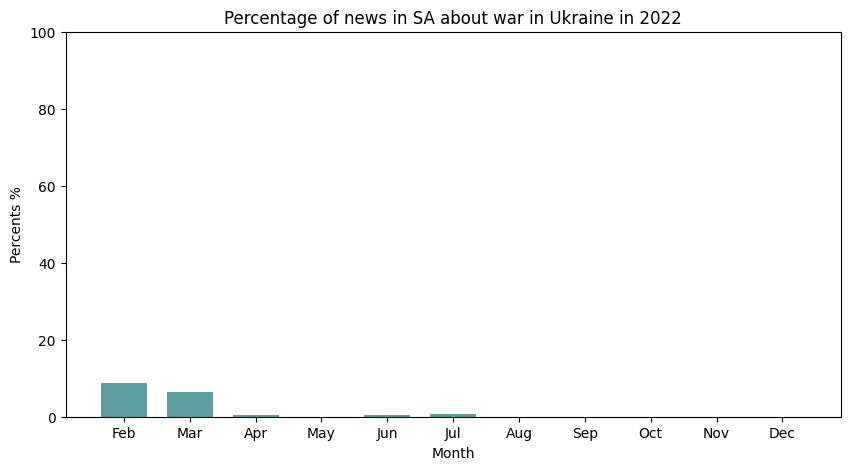

In [33]:
months = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(months, war_perc_2022, color ='CadetBlue', width = 0.7)
plt.ylim(0, 100)

plt.xlabel("Month")
plt.ylabel("Percents %")
plt.title("Percentage of news in SA about war in Ukraine in 2022")
plt.show()

<font color='DarkTurquoise'>

## Jan - May 2023
</font>

Creating dataframe for period (Jan - May 2023)

In [34]:
df_2023 = df[df['date'] >= datetime(2023, 1, 1)].copy()
df_2023['month'] = df_2023['date'].apply(lambda x: get_month(x))

Forming dataframe containing only news about war in Ukraine:

In [35]:
war_df_2023 = war_df[war_df['date'] >= datetime(2023, 1, 1)].copy()
war_df_2023['month'] = war_df_2023['date'].apply(lambda x: get_month(x))
war_df_2023.head()

,title,date,url,month
16,President Ramaphosa reiterates South Africa's ...,2023-05-15,https://www.sanews.gov.za/south-africa/preside...,5
651,SA explains abstention from Ukraine resolution...,2023-02-25,https://www.sanews.gov.za/south-africa/sa-expl...,2
968,Russia-Ukraine conflict should end through dip...,2023-01-23,https://www.sanews.gov.za/south-africa/russia-...,1
975,SA's navy exercises between China and Russia t...,2023-01-23,https://www.sanews.gov.za/south-africa/sas-nav...,1
982,SANDF to host China and Russia for multilatera...,2023-01-20,https://www.sanews.gov.za/south-africa/sandf-h...,1


In [36]:
war_perc_2023 = []
months = list(range(1, 6))
for month in months:
    month_df = df_2023[df_2023['month'] == month].shape[0]
    month_war_df = war_df_2023[war_df_2023['month'] == month].shape[0]
    try:
        war_perc_2023.append(round(month_war_df/month_df * 100, 2))
    except ZeroDivisionError:
        war_perc_2023.append(0.0)

### Building plot 2023

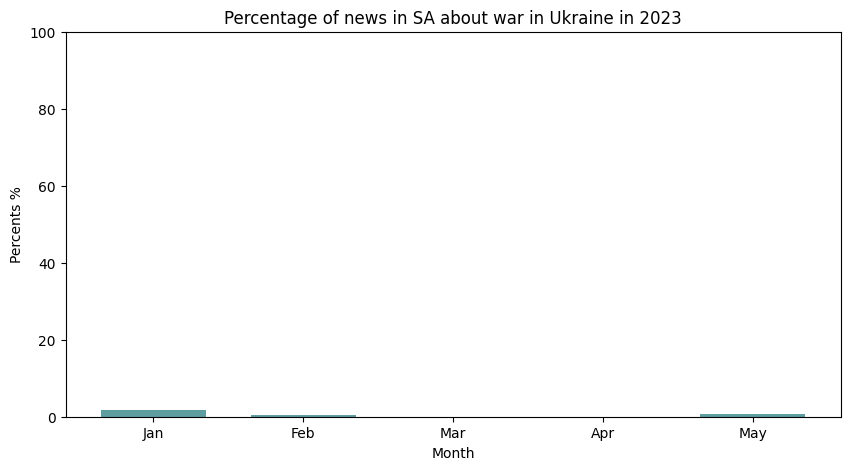

In [37]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(months, war_perc_2023, color ='CadetBlue', width = 0.7)
plt.ylim(0, 100)

plt.xlabel("Month")
plt.ylabel("Percents %")
plt.title("Percentage of news in SA about war in Ukraine in 2023")
plt.show()

<center>
<font color='DarkTurquoise'>

# Japan

</font>
</center>

**"The Japan Times"** news website is a prominent and reputable online platform that provides comprehensive coverage of news and current affairs related to Japan. With a strong focus on both domestic and international news, the website serves as a valuable resource for readers seeking reliable and up-to-date information about Japan and its place in the world.

In [38]:
def create_dateframe():
    """
    create dataframe from news dataframe
    """
    df = pd.read_json('datasets/news.json')
    date_format = '%Y-%m-%d'
    df['date'] = pd.to_datetime(df['date'], format=date_format)
    # df = df.sort_values(by='date')
    df = df[df['date'] >= '2022-01-01']
    return df

df = create_dateframe()
df.head()

,title,date,text
0,Last known speaker fights to preserve South Af...,2023-05-19,N|uu was spoken by one of many hunter-gatherer...
1,More than half of the world's large lakes are ...,2023-05-19,Report shows the world's most important freshw...
2,Pentagon accounting error overvalued Ukraine w...,2023-05-19,The error was the result of assigning a higher...
3,"At the G7 summit in Hiroshima, all eyes will b...",2023-05-18,Discussions on the issue will come at a crucia...
4,"Next five years to be hottest ever, likely cro...",2023-05-18,Report marks the first time the agency has for...


Forming dataframe containing only news about war in Ukraine:

In [39]:
ukr_df = df[df['title'].apply(lambda x: check(x))]
ukr_df = ukr_df.reset_index()
ukr_df['year'] = pd.DatetimeIndex(ukr_df['date']).year
ukr_df['month'] = pd.DatetimeIndex(ukr_df['date']).month
ukr_df.head()

,index,title,date,text,year,month
0,2,Pentagon accounting error overvalued Ukraine w...,2023-05-19,The error was the result of assigning a higher...,2023,5
1,3,"At the G7 summit in Hiroshima, all eyes will b...",2023-05-18,Discussions on the issue will come at a crucia...,2023,5
2,15,U.S. wires Ukraine with radiation sensors to d...,2023-04-30,"In part, the goal is to make sure that if Russ...",2023,4
3,21,"In first, Kyiv says it shot down volley of Rus...",2023-05-17,"When asked about the Ukrainian claim, Russian ...",2023,5
4,22,Putin’s war revives Russia’s dark tradition of...,2023-05-16,The informers are a reflection of the sweeping...,2023,5


In [40]:
months_ukr_df = ukr_df.pivot_table(columns=['year', 'month'], aggfunc='size')
months_ukr_df = months_ukr_df.reset_index()
months_ukr_df.columns = ['year', 'month', 'count']
months_ukr_df['date_plt'] = months_ukr_df['year'].apply(str) + '-' + months_ukr_df['month'].apply(str)
months_ukr_df.head()

,year,month,count,date_plt
0,2022,1,36,2022-1
1,2022,2,91,2022-2
2,2022,3,145,2022-3
3,2022,4,107,2022-4
4,2022,5,88,2022-5


In [41]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
months_df = df.pivot_table(columns=['year', 'month'], aggfunc='size')
months_df = months_df.reset_index()
months_df.columns = ['year', 'month', 'count']
months_df['date_plt'] = months_df['year'].apply(str) + '-' + months_df['month'].apply(str)
months_df.head()

,year,month,count,date_plt
0,2022,1,147,2022-1
1,2022,2,178,2022-2
2,2022,3,205,2022-3
3,2022,4,175,2022-4
4,2022,5,190,2022-5


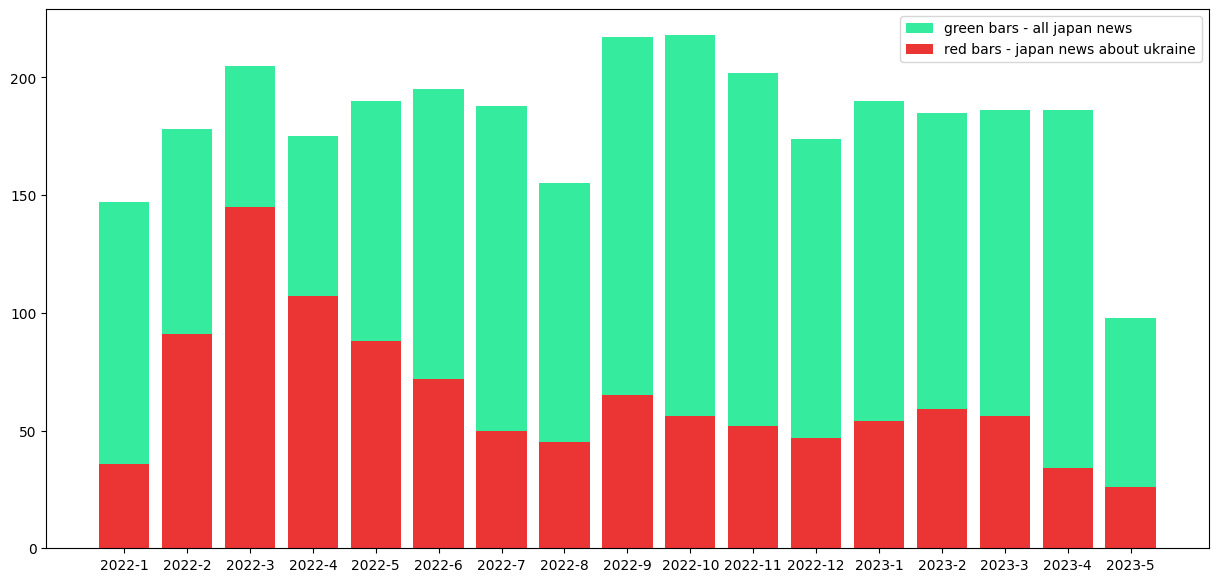

In [42]:
plt.figure(figsize=(15, 7))
plt.bar(months_df['date_plt'], months_df['count'], color='#34eb9e')   
plt.bar(months_ukr_df['date_plt'], months_ukr_df['count'], color='#eb3434')
plt.legend(['green bars - all japan news', 'red bars - japan news about ukraine'])
plt.show()

<center>
<h2 style="color: #a5e9db">
The analysis of news coverage within the region of Donetsk, Ukraine, a significant epicenter of the ongoing conflict.
</h2>

</center>

The conflict in Eastern Ukraine, particularly in Donetsk, has been a focal point of international attention due to its far-reaching implications. As researchers dedicated to understanding the multifaceted nature of this conflict, we have directed our efforts towards examining the local news landscape within Donetsk to gain deeper insights into the narratives, perspectives, and impact of media reporting.

<center>
<font color='DarkTurquoise'>

# Ukraine. Donetsk

</font>
</center>

In [43]:
df = pd.read_json('datasets/news_dan.json')
df['year'] = pd.to_datetime(df['date'], format='%d.%m.%Y %H:%M').dt.year

usless_words = ['что', 'это', 'для', 'как', 'так', 'и', 'в', 'над', 'к', 'до', 'не', 'на', 'но', 'за', 'то', 'с', 'ли', 'а', 'донбассе','донбасса']
colors = ['#0080ff', '#00ffff', '#00ff80']

In [44]:
word_frequencies_by_year = {}
for year, group in df.groupby('year'):
    titles = ' '.join(group['title'])
    word_tokens = word_tokenize(titles.lower())
    word_tokens = [word for word in word_tokens if (word.isalpha() and len(word) > 2) and word not in usless_words] # Remove punctuation
    word_frequencies_by_year[year] = FreqDist(word_tokens)
word_frequencies_by_year

{2015: FreqDist({'днр': 216, 'обсе': 117, 'пушилин': 58, 'боинга': 45, 'минске': 25, 'киева': 25, 'захарченко': 21, 'крушения': 21, 'хуг': 20, 'власти': 20, ...}),
 2016: FreqDist({'днр': 230, 'обсе': 129, 'пушилин': 39, 'мид': 34, 'замглавы': 32, 'захарченко': 31, 'хуг': 31, 'миссии': 31, 'минобороны': 30, 'всу': 29, ...}),
 2017: FreqDist({'днр': 256, 'обсе': 115, 'минске': 46, 'донецке': 40, 'лнр': 40, 'жителей': 38, 'смм': 36, 'всу': 32, 'под': 32, 'пушилин': 31, ...}),
 2018: FreqDist({'днр': 328, 'обсе': 81, 'минске': 64, 'мид': 47, 'всу': 45, 'пушилин': 36, 'лнр': 32, 'мккк': 28, 'сцкк': 26, 'оон': 25, ...}),
 2019: FreqDist({'днр': 279, 'мид': 83, 'обсе': 69, 'минске': 52, 'донецке': 32, 'киев': 29, 'пушилин': 29, 'киева': 28, 'разведения': 27, 'всу': 24, ...}),
 2020: FreqDist({'днр': 135, 'обсе': 49, 'мид': 26, 'киева': 24, 'унм': 22, 'никонорова': 21, 'стран': 14, 'всу': 14, 'республики': 12, 'миссии': 11, ...}),
 2021: FreqDist({'днр': 112, 'обсе': 84, 'киева': 19, 'донецке

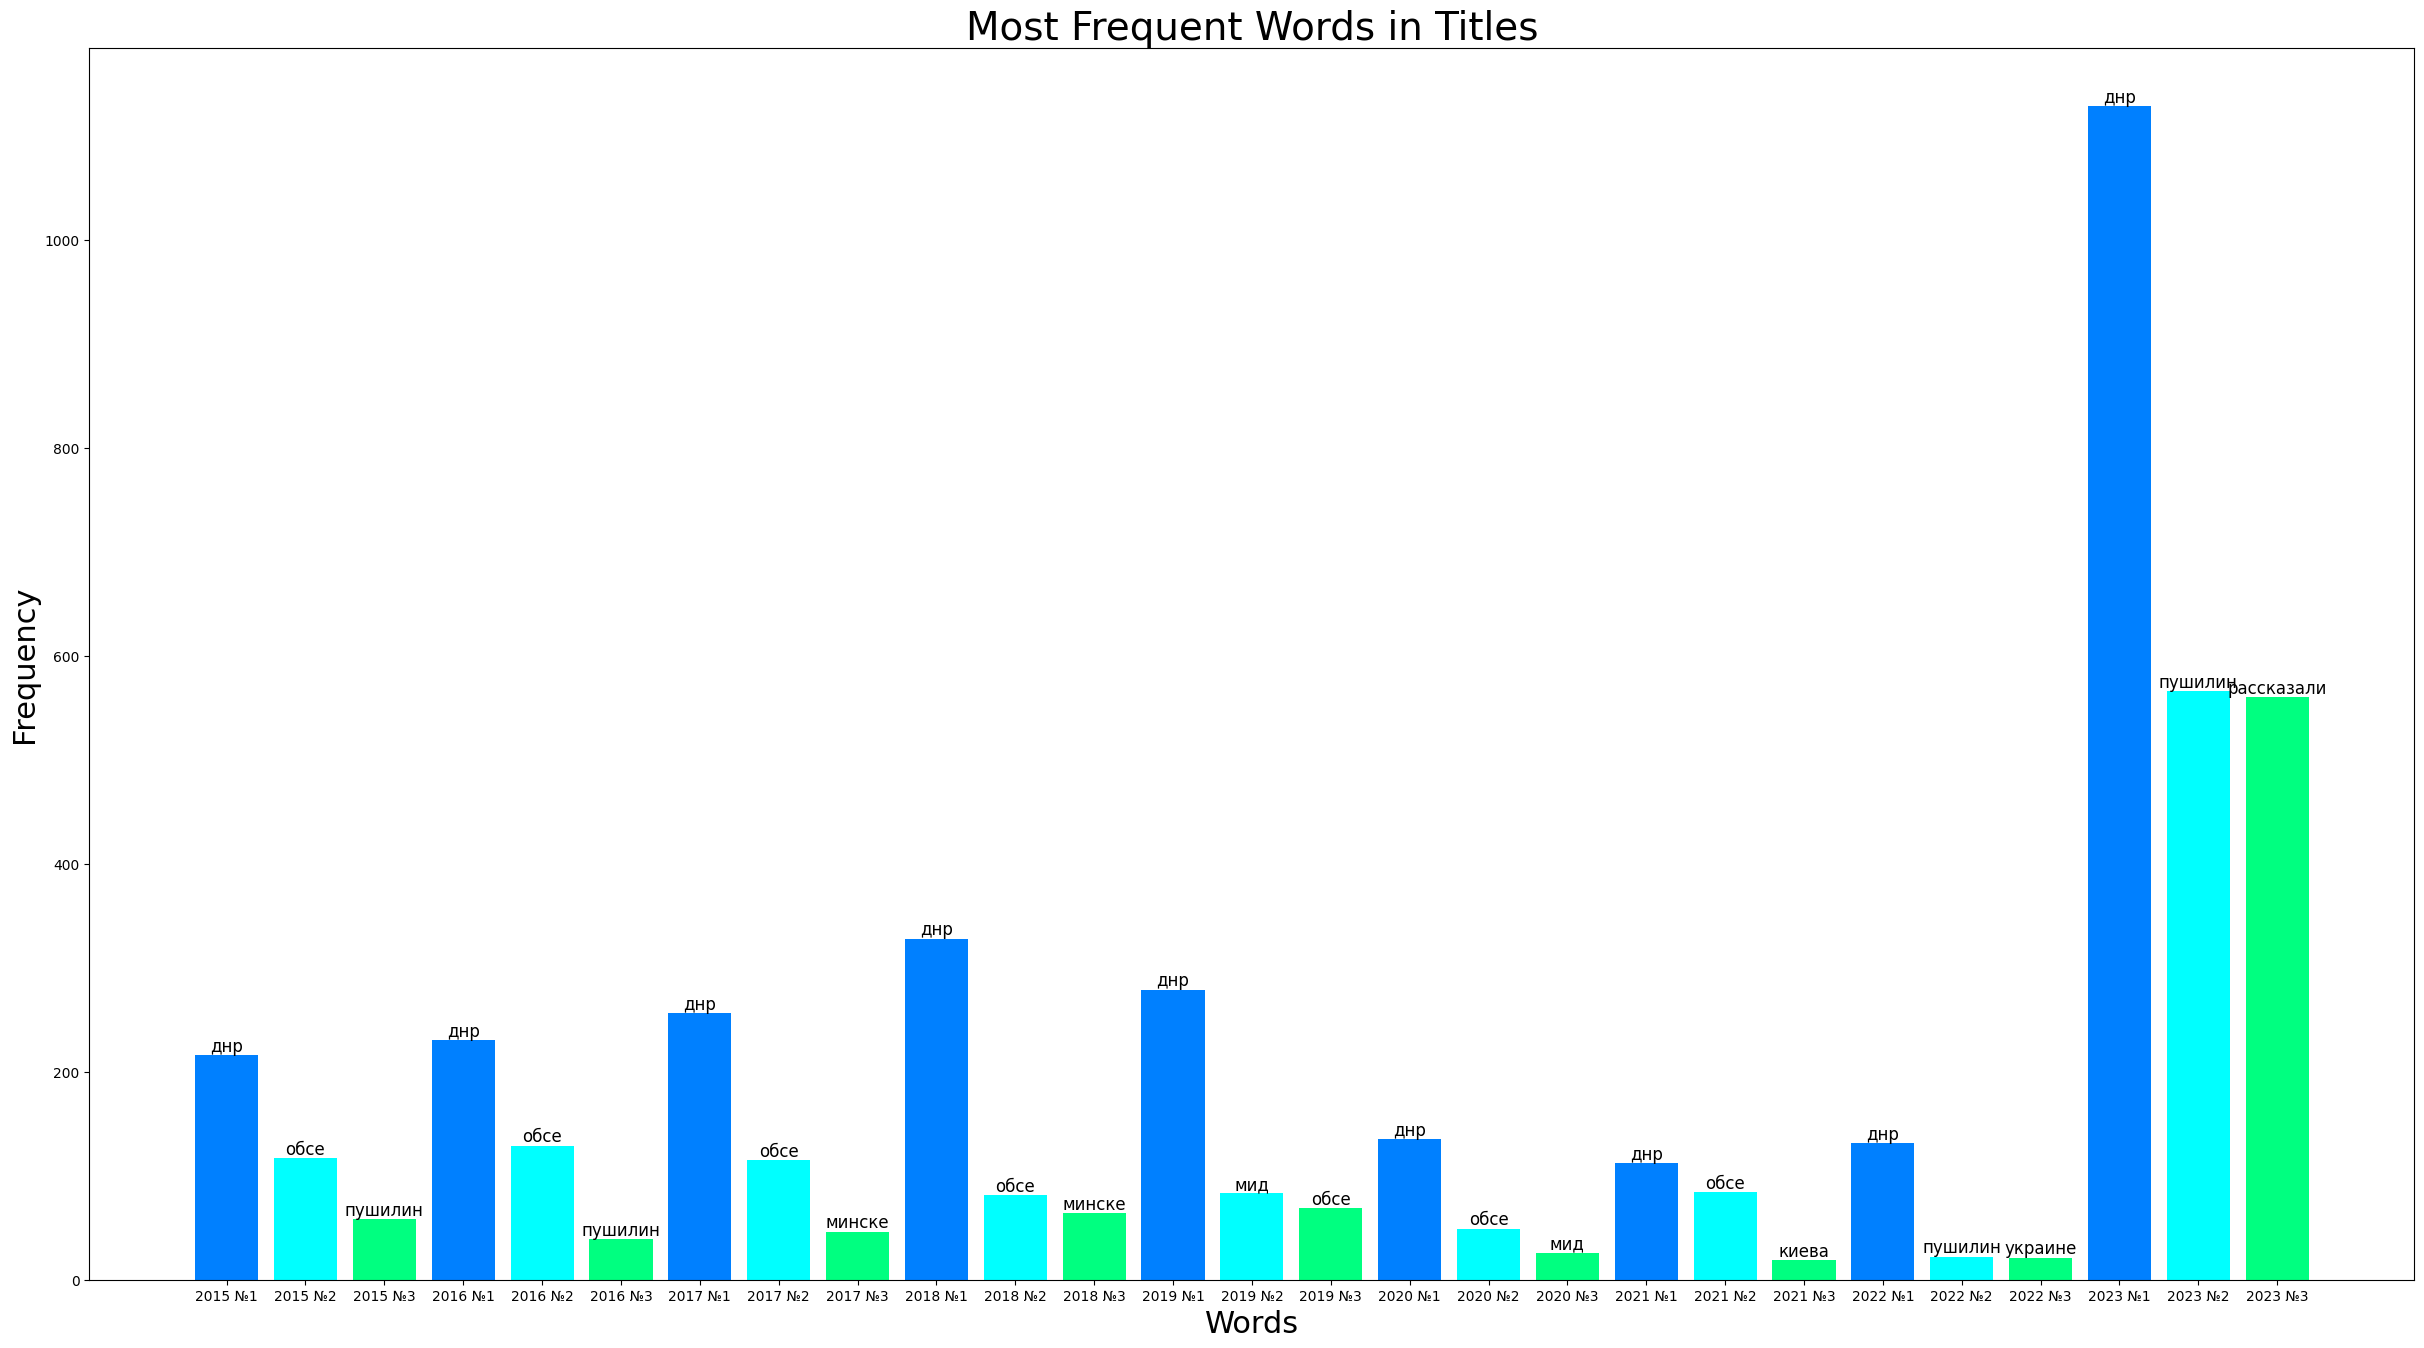

In [45]:
plt.figure(figsize=(30, 16))

for year, word_frequencies in word_frequencies_by_year.items():
    most_common_words = word_frequencies.most_common(3)
    words, frequencies = zip(*most_common_words)

    for index, word in enumerate(words):
        plt.bar(f'{year} №{index+1}', frequencies[index], color=colors[index]) 
        plt.text(f'{year} №{index+1}', frequencies[index], word, ha='center', va='bottom', fontsize=12)

plt.title("Most Frequent Words in Titles", fontsize=28)
plt.xlabel("Words", fontsize=22)
plt.ylabel("Frequency", fontsize=22)
plt.show()

<center>
<font color='DarkTurquoise'>

# Conclusion

</font>
</center>

...